<a href="https://colab.research.google.com/github/duncantanner/Assignments/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://www.github.com/DS3001/kmc



Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
#Question 1
import numpy as np
import pandas as pd
df = pd.read_csv('./kmc/data/airbnb_hw.csv')
print('Question 1:','\n')

df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

X = df.loc[:,['price','beds','n_reviews','score']]
print(X.shape)
X.describe()


Question 1: 

(30478, 4)


,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [4]:
X['price'].value_counts()
X['price'] = X['price'].str.replace(',','')
X['price'] = pd.to_numeric(X['price'],errors='coerce')
X.describe()


,price,beds,n_reviews,score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [5]:
X['beds'] = X['beds'].fillna(1)
X.describe()


,price,beds,n_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [9]:
pd.crosstab(df['score'].isnull(), df['n_reviews']>0)
X = X.dropna()
X.describe()

,price,beds,n_reviews,score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [12]:
def maxmin(x):
  u = (x-min(x))/max(x)-min(x)
  return u

Z = X.drop('price', axis =1)
Z = Z.apply(maxmin)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_
Z.describe()

,beds,n_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,-0.939668,-19.280068,3.060212
std,0.065205,0.094585,0.088504,2.076836
min,0.000000,-1.000000,-20.000000,0.000000
25%,0.062500,-0.996109,-19.310000,1.000000
50%,0.062500,-0.976654,-19.260000,3.000000
75%,0.125000,-0.926070,-19.200000,5.000000
max,1.000000,-0.003891,-19.200000,5.000000


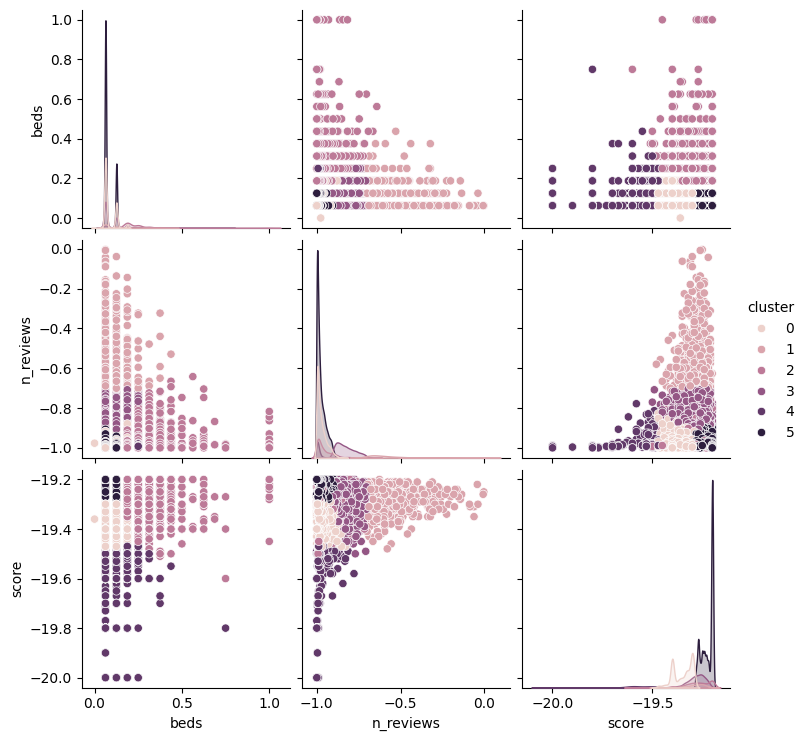

In [14]:
import seaborn as sns
sns.pairplot(data=Z, hue='cluster')

In [15]:
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         5429.0  130.869589  102.307939  20.0   75.0  110.0  168.0   5000.0
1          784.0  133.265306   83.351575  27.0   80.0  110.0  169.0    875.0
2         1975.0  290.497722  263.043281  26.0  150.0  225.0  350.0   4500.0
3         3053.0  141.387160   83.620387  22.0   86.0  125.0  175.0   1000.0
4          664.0  135.063253  212.468986  25.0   65.0   99.0  159.0   5000.0
5        10250.0  148.222341  139.539892  10.0   85.0  129.0  185.0  10000.0

Based on the chart, cluster 2 has the highest mean rental price, which is 142 more than the next closest cluster, cluster 5.

Text(0.5, 1.0, 'Scree Plot')

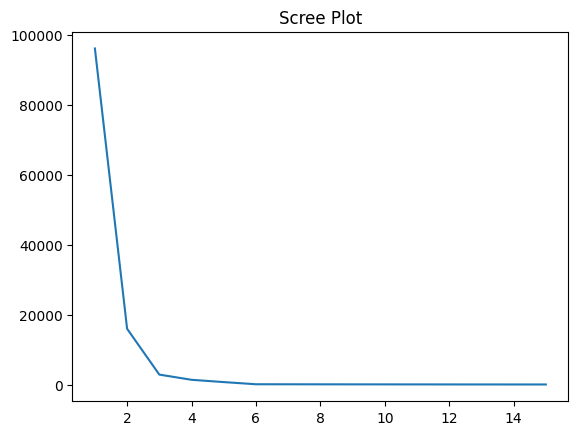

In [18]:
k_bar = 15
k_grid = np.arange(1, k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(Z)
  SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        10914.0  147.421752  145.048717  10.0  85.0  125.0  185.0  10000.0
1         6213.0  131.171898  100.111194  20.0  75.0  110.0  169.0   5000.0
2         5028.0  199.957836  191.623188  22.0  99.0  150.0  235.0   4500.0

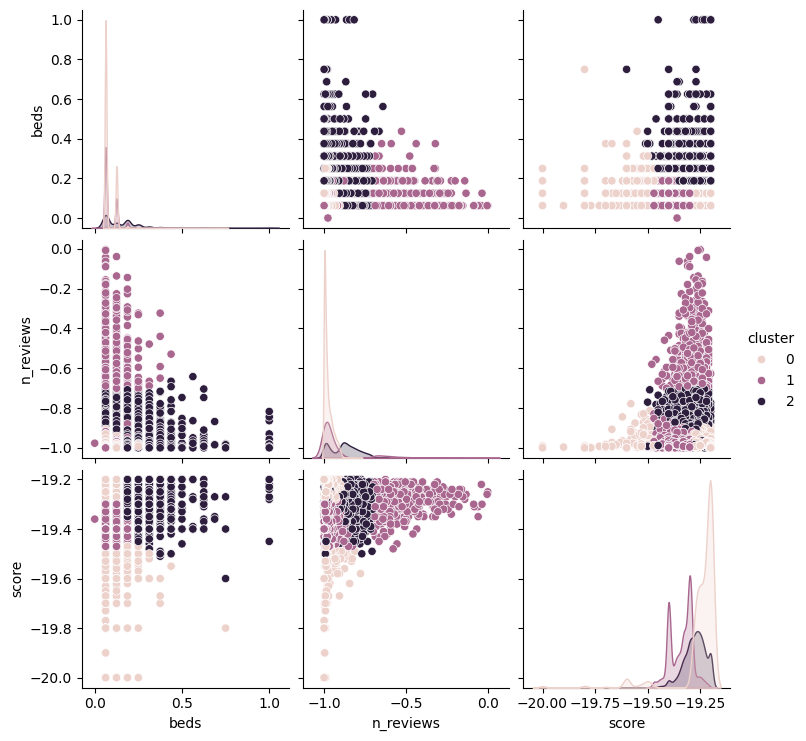

In [19]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

Question 2: 



<Axes: xlabel='x1', ylabel='x2'>

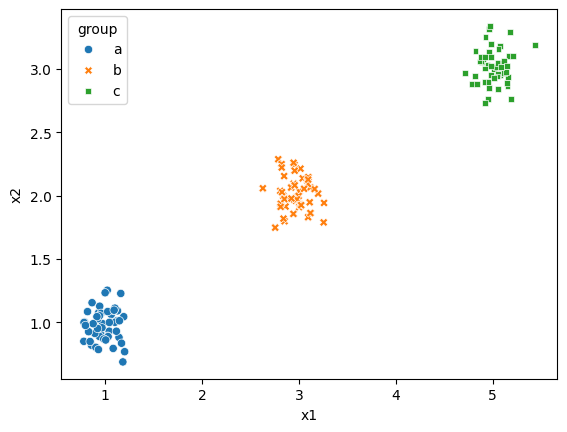

In [23]:
print('Question 2:','\n')
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

sns.scatterplot(data=df0_125, x = 'x1', y ='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

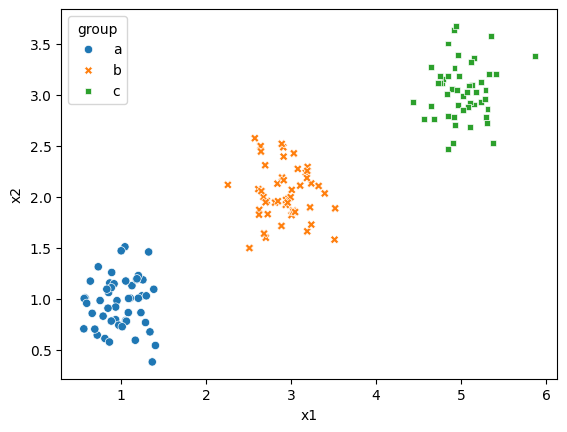

In [25]:
sns.scatterplot(data=df0_25, x = 'x1', y ='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

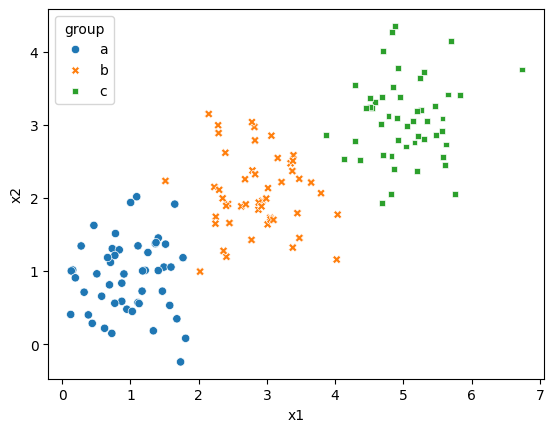

In [26]:
sns.scatterplot(data=df0_5, x = 'x1', y ='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

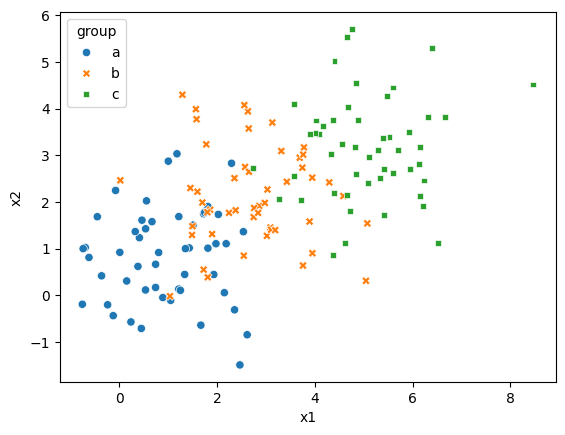

In [27]:
sns.scatterplot(data=df1_0, x = 'x1', y ='x2',hue='group',style='group')


<Axes: xlabel='x1', ylabel='x2'>

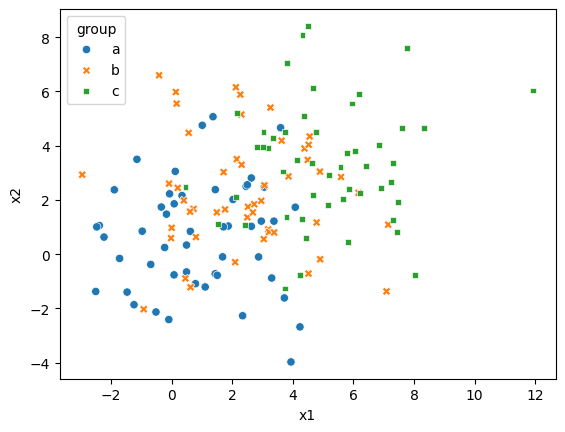

In [28]:
sns.scatterplot(data=df2_0, x = 'x1', y ='x2',hue='group',style='group')

As noise increases from 0.125 to 2, the visual disctinctness of the clusters decreases.

In [32]:
datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]

# Plot scree plots for each dataset
def scree(data): # I built a function to make scree plots quickly
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)


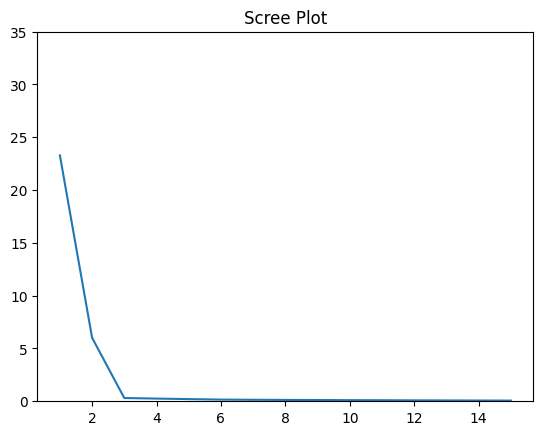

In [33]:
scree(data = df0_125)

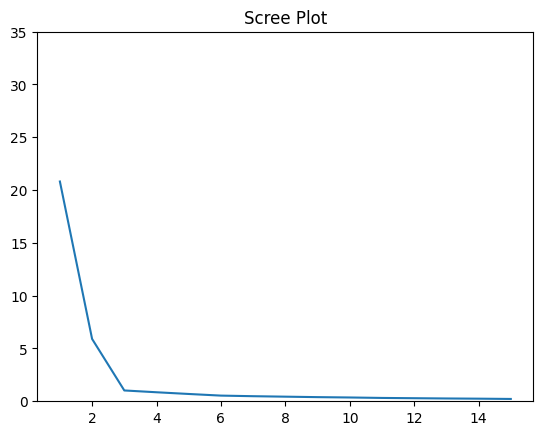

In [34]:
scree(data = df0_25)

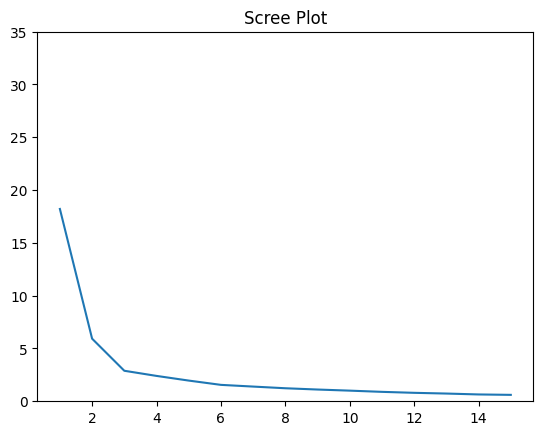

In [35]:
scree(data = df0_5)

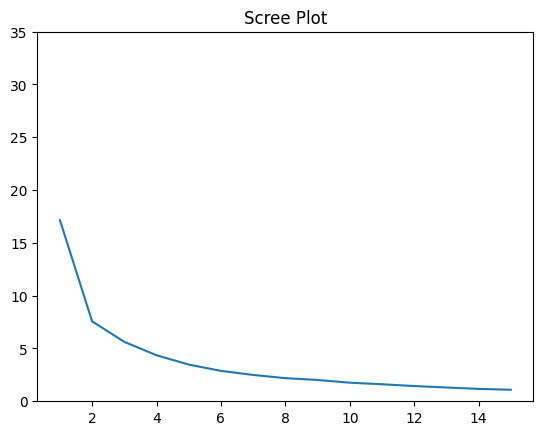

In [36]:
scree(data = df1_0)

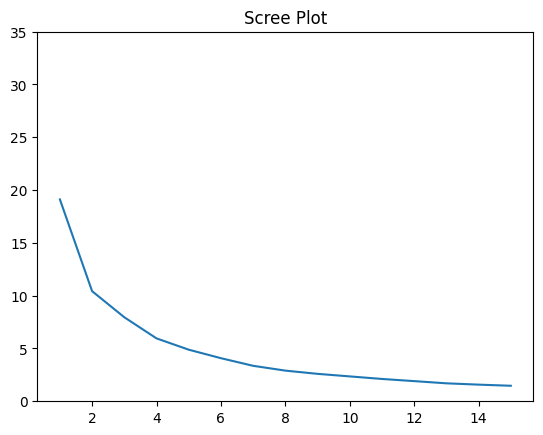

In [37]:
scree(data = df2_0)

As noise increases, the prevalence of an elbow decreases. In a situation with low noise, you create clusters that are more distinct and the use of the scree plot will work more because the elbow will also be distinct, and vice versa.